# Digit Recognition

### - The images are of dimensions 28 x 28 x 1(grayscale)
### - Model: Somewhat of an AlexNet
### - Accuracy > 90% on validation set

### Model: 

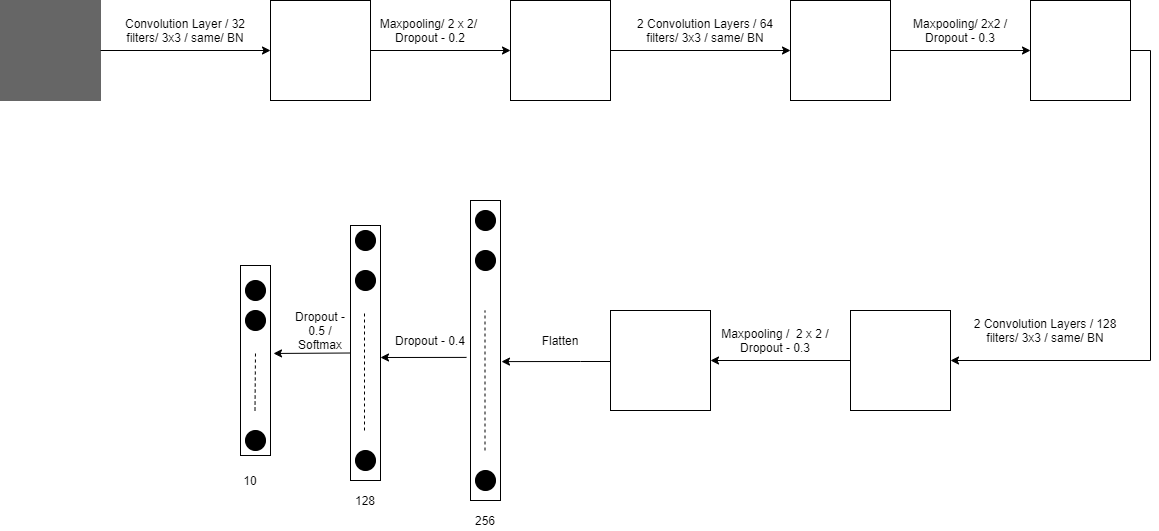

In [1]:
# Importing the libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [0]:
# Getting the training and testing data

train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv').values
trainY = train.iloc[:,0].values
trainX = train.iloc[:,1:].values
train_data, validation_data, train_labels, validation_labels = train_test_split(trainX,trainY,test_size=0.2,random_state=1)

In [3]:
train_data.shape

(2292, 784)

In [4]:
validation_data.shape

(573, 784)

In [5]:
test_data.shape

(2867, 784)

In [6]:
# Data augmentation

train_data = (train_data.reshape(train_data.shape[0],1,28,28).transpose(0,2,3,1)/255.0).astype('float32')
print('Train Data Shape: ',train_data.shape)

validation_data = (validation_data.reshape(validation_data.shape[0],1,28,28).transpose(0,2,3,1)/255.0).astype('float32')
print('Validation Data Shape: ',validation_data.shape)

test_data = (test_data.reshape(test_data.shape[0],1,28,28).transpose(0,2,3,1)/255.0).astype('float32')
print('Test Data Shape: ',test_data.shape)

Train Data Shape:  (2292, 28, 28, 1)
Validation Data Shape:  (573, 28, 28, 1)
Test Data Shape:  (2867, 28, 28, 1)


In [0]:
# Applying one hot encoder for labels 

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)

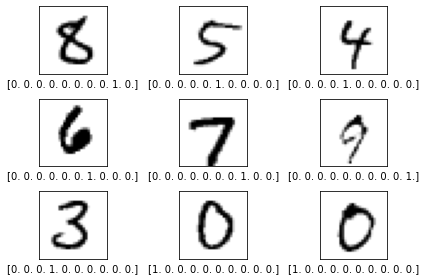

In [8]:
# Taking a look at our first 9 training images

for i in range(9):
    
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
    
plt.tight_layout()
plt.show()

In [0]:
# Defining our model

def define_model():
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
   
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
# run this function to start evaluating the model

def run_model(trainX,trainY,validationX,validationY):
    
    global history, model
    # define and fit the model 
    model = define_model()
    history = model.fit(trainX, trainY, epochs=25, batch_size = 64, validation_data=(validationX, validationY), verbose=0)
    
    # evaluating model
    _, acc = model.evaluate(validationX, validationY, verbose=0)
    print('%.3f' % (acc * 100.0))

In [33]:
# run the model

run_model(train_data,train_labels,validation_data,validation_labels)

94.939


In [0]:
# Plot for summary and evaluating model

def summarize_diagnostics(history):
    
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    
    # save plot to file
    plt.savefig('/content/plot.png')
    plt.close()

In [0]:
# learning curves

summarize_diagnostics(history)

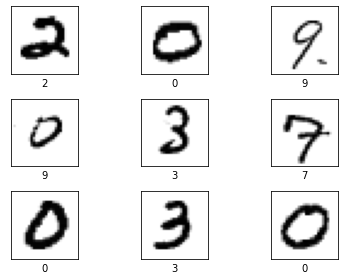

In [30]:
# Taking a look at our first 9 test images

prediction = model.predict_classes(test_data[0:9])
for i in range(9):
    
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_data[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(classes[prediction[i]])
    
plt.tight_layout()
plt.show()